In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as  plt
import seaborn as sns

import random
from random import sample

pd.set_option('display.max_columns', 1000)
from scipy.interpolate import interp1d
from scipy import interpolate as inter
import scipy.stats
from pandas.plotting import table 
import dataframe_image as dfi

from PIL import Image
pd.set_option('mode.chained_assignment',None)

In [2]:
metabolic = pd.read_csv('metabolic_corr.csv',index_col=0)

In [3]:
display(metabolic.head(20))
display(metabolic.tail(20))


TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   
TAdipose - Visceral (Omentum)M025G001                         0.134702   
TArtery - AortaM020G001                                       0.125879   
TArtery - AortaM029G001                                      -0.189432   
TArtery - AortaM031G001                                      -0.121794   
TArtery - TibialM026G001                                      0.113968   
TArtery - TibialM029G001                                      0.026996   
TArtery - TibialM035G001                                      0.186529   
TBreast - Mammary TissueM016G001                              0.158429   
TBreast - Mammary TissueM017G001                              0.222070   
TCells - Cultured fibroblastsM002G001                         0.027928   
TEsophagus - MucosaM022G001                                  -0.074932   
TEsophagus - MuscularisM019G001                               0.206707   
TEsophagus - MuscularisM035G001                              -0.113269   
THeart - Atrial AppendageM003G001                            -0.034198   
THeart - Atrial AppendageM025G001                             0.049718   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   
TAdipose - Visceral (Omentum)M025G001                        -0.039940   
TArtery - AortaM020G001                                       0.145727   
TArtery - AortaM029G001                                      -0.055024   
TArtery - AortaM031G001                                      -0.101602   
TArtery - TibialM026G001                                      0.254089   
TArtery - TibialM029G001                                     -0.419236   
TArtery - TibialM035G001                                     -0.234707   
TBreast - Mammary TissueM016G001                             -0.020976   
TBreast - Mammary TissueM017G001                             -0.068390   
TCells - Cultured fibroblastsM002G001                        -0.135748   
TEsophagus - MucosaM022G001                                   0.040805   
TEsophagus - MuscularisM019G001                               0.114444   
TEsophagus - MuscularisM035G001                              -0.126502   
THeart - Atrial AppendageM003G001                             0.118740   
THeart - Atrial AppendageM025G001                             0.077329   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   
TAdipose - Visceral (Omentum)M025G001                        -0.094004   
TArtery - AortaM020G001                                      -0.275146   
TArtery - AortaM029G001                                      -0.079593   
TArtery - AortaM031G001                                      -0.141973   
TArtery - TibialM026G001                                      0.396750   
TArtery - TibialM029G001                                     -0.412570   
TArtery - TibialM035G001                 

TAdipose - SubcutaneousM003G001  \
THeart - Left VentricleM003G001                                     -0.032000   
TLiverM010G001                                                      -0.084974   
TLiverM036G001                                                      -0.136013   
TLiverM038G001                                                      -0.125759   
TLungM001G001                                                       -0.100938   
TLungM004G001                                                       -0.072336   
TLungM015G001                                                       -0.109424   
TLungM025G001                                                        0.171658   
TMuscle - SkeletalM007G001                                           0.156986   
TNerve - TibialM012G001                                             -0.019363   
TNerve - TibialM017G001                                             -0.150561   
TSkin - Not Sun Exposed (Suprapubic)M006G001                         0.130140   
TSkin - Not Sun Exposed (Suprapubic)M013G001                        -0.049229   
TSkin - Sun Exposed (Lower leg)M024G001                             -0.008718   
TSkin - Sun Exposed (Lower leg)M036G001                              0.083376   
TTestisM002G001                                                      0.008517   
TThyroidM018G001                                                     0.017593   
TThyroidM032G001                                                    -0.005457   
TWhole BloodM002G001                                                -0.069071   
TWhole BloodM007G001                                                -0.112304   

                                              TAdipose - SubcutaneousM032G001  \
THeart - Left VentricleM003G001                                     -0.127054   
TLiverM010G001                                                      -0.083299   
TLiverM036G001                                                      -0.100977   
TLiverM038G001                                                       0.019475   
TLungM001G001                                                       -0.192514   
TLungM004G001                                                       -0.018581   
TLungM015G001                                                        0.141619   
TLungM025G001                                                        0.048976   
TMuscle - SkeletalM007G001                                          -0.168553   
TNerve - TibialM012G001                                              0.016797   
TNerve - TibialM017G001                                             -0.116788   
TSkin - Not Sun Exposed (Suprapubic)M006G001                        -0.158013   
TSkin - Not Sun Exposed (Suprapubic)M013G001                         0.058744   
TSkin - Sun Exposed (Lower leg)M024G001                              0.079590   
TSkin - Sun Exposed (Lower leg)M036G001                             -0.045184   
TTestisM002G001                                                     -0.094100   
TThyroidM018G001                                                     0.021687   
TThyroidM032G001                                                    -0.107820   
TWhole BloodM002G001                                                -0.033059   
TWhole BloodM007G001                                                 0.130825   

                                              TAdipose - SubcutaneousM038G001  \
THeart - Left VentricleM003G001                                     -0.127083   
TLiverM010G001                                                      -0.230754   
TLiverM036G001                                                      -0.372227   
TLiverM038G001                                                      -0.502258   
TLungM001G001                                                        0.009424   
TLungM004G001                                                        0.092035   
TLungM015G001                                                        0.0032

In [4]:
metabolic = metabolic.dropna(axis=0,how='all')
metabolic = metabolic.dropna(axis=1,how='all')
#metabolic = metabolic.dropna(axis=0,how='any')
#metabolic = metabolic.dropna(axis=1,how='any')


In [5]:
display(metabolic.head(20))
display(metabolic.tail(20))


TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   
TAdipose - Visceral (Omentum)M025G001                         0.134702   
TArtery - AortaM020G001                                       0.125879   
TArtery - AortaM029G001                                      -0.189432   
TArtery - AortaM031G001                                      -0.121794   
TArtery - TibialM026G001                                      0.113968   
TArtery - TibialM029G001                                      0.026996   
TArtery - TibialM035G001                                      0.186529   
TBreast - Mammary TissueM016G001                              0.158429   
TBreast - Mammary TissueM017G001                              0.222070   
TCells - Cultured fibroblastsM002G001                         0.027928   
TEsophagus - MucosaM022G001                                  -0.074932   
TEsophagus - MuscularisM019G001                               0.206707   
TEsophagus - MuscularisM035G001                              -0.113269   
THeart - Atrial AppendageM003G001                            -0.034198   
THeart - Atrial AppendageM025G001                             0.049718   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   
TAdipose - Visceral (Omentum)M025G001                        -0.039940   
TArtery - AortaM020G001                                       0.145727   
TArtery - AortaM029G001                                      -0.055024   
TArtery - AortaM031G001                                      -0.101602   
TArtery - TibialM026G001                                      0.254089   
TArtery - TibialM029G001                                     -0.419236   
TArtery - TibialM035G001                                     -0.234707   
TBreast - Mammary TissueM016G001                             -0.020976   
TBreast - Mammary TissueM017G001                             -0.068390   
TCells - Cultured fibroblastsM002G001                        -0.135748   
TEsophagus - MucosaM022G001                                   0.040805   
TEsophagus - MuscularisM019G001                               0.114444   
TEsophagus - MuscularisM035G001                              -0.126502   
THeart - Atrial AppendageM003G001                             0.118740   
THeart - Atrial AppendageM025G001                             0.077329   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   
TAdipose - Visceral (Omentum)M025G001                        -0.094004   
TArtery - AortaM020G001                                      -0.275146   
TArtery - AortaM029G001                                      -0.079593   
TArtery - AortaM031G001                                      -0.141973   
TArtery - TibialM026G001                                      0.396750   
TArtery - TibialM029G001                                     -0.412570   
TArtery - TibialM035G001                 

TAdipose - SubcutaneousM003G001  \
THeart - Left VentricleM003G001                                     -0.032000   
TLiverM010G001                                                      -0.084974   
TLiverM036G001                                                      -0.136013   
TLiverM038G001                                                      -0.125759   
TLungM001G001                                                       -0.100938   
TLungM004G001                                                       -0.072336   
TLungM015G001                                                       -0.109424   
TLungM025G001                                                        0.171658   
TMuscle - SkeletalM007G001                                           0.156986   
TNerve - TibialM012G001                                             -0.019363   
TNerve - TibialM017G001                                             -0.150561   
TSkin - Not Sun Exposed (Suprapubic)M006G001                         0.130140   
TSkin - Not Sun Exposed (Suprapubic)M013G001                        -0.049229   
TSkin - Sun Exposed (Lower leg)M024G001                             -0.008718   
TSkin - Sun Exposed (Lower leg)M036G001                              0.083376   
TTestisM002G001                                                      0.008517   
TThyroidM018G001                                                     0.017593   
TThyroidM032G001                                                    -0.005457   
TWhole BloodM002G001                                                -0.069071   
TWhole BloodM007G001                                                -0.112304   

                                              TAdipose - SubcutaneousM032G001  \
THeart - Left VentricleM003G001                                     -0.127054   
TLiverM010G001                                                      -0.083299   
TLiverM036G001                                                      -0.100977   
TLiverM038G001                                                       0.019475   
TLungM001G001                                                       -0.192514   
TLungM004G001                                                       -0.018581   
TLungM015G001                                                        0.141619   
TLungM025G001                                                        0.048976   
TMuscle - SkeletalM007G001                                          -0.168553   
TNerve - TibialM012G001                                              0.016797   
TNerve - TibialM017G001                                             -0.116788   
TSkin - Not Sun Exposed (Suprapubic)M006G001                        -0.158013   
TSkin - Not Sun Exposed (Suprapubic)M013G001                         0.058744   
TSkin - Sun Exposed (Lower leg)M024G001                              0.079590   
TSkin - Sun Exposed (Lower leg)M036G001                             -0.045184   
TTestisM002G001                                                     -0.094100   
TThyroidM018G001                                                     0.021687   
TThyroidM032G001                                                    -0.107820   
TWhole BloodM002G001                                                -0.033059   
TWhole BloodM007G001                                                 0.130825   

                                              TAdipose - SubcutaneousM038G001  \
THeart - Left VentricleM003G001                                     -0.127083   
TLiverM010G001                                                      -0.230754   
TLiverM036G001                                                      -0.372227   
TLiverM038G001                                                      -0.502258   
TLungM001G001                                                        0.009424   
TLungM004G001                                                        0.092035   
TLungM015G001                                                        0.0032

In [6]:
print(metabolic.shape)
met_shape = metabolic.shape[0]

(40, 40)


In [7]:
corr_thresholds = list(range(120, 651, 5))
myInt = 1000
corr_thresholds[:] = [x / myInt for x in corr_thresholds]
print(corr_thresholds)
print(len(corr_thresholds))

pos_cases = [0]*107
neg_cases = [0]*107
ratio_pos_neg = [0]*107



[0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65]
107


In [8]:
corrlist = []
metabolic_indexes = metabolic.index.tolist()
metabolic_columns = metabolic.columns.tolist()

for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        #if meti !=metj:
        corrlist.append(metabolic.iloc[i,j])
        
inter_met_corr = len(corrlist)
print(inter_met_corr)



780


In [9]:
d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'ratio pos neg' : ratio_pos_neg}
     
df_metabolic = pd.DataFrame(d)


for i in range(df_metabolic.shape[0]):
    count_pos = 0
    count_neg = 0
    for j in range(len(corrlist)):
        if corrlist[j] >= df_metabolic['corr thresholds'].iloc[i]:
            count_pos +=1
    for j in range(len(corrlist)):
        if corrlist[j] <= -df_metabolic['corr thresholds'].iloc[i]:
            count_neg +=1
    df_metabolic['pos cases'].iloc[i] = count_pos
    df_metabolic['neg cases'].iloc[i] = count_neg
    df_metabolic['ratio pos neg'].iloc[i] = count_pos / max(count_neg,1)
    
display(df_metabolic.head(50))   
                   
        

corr thresholds  pos cases  neg cases  ratio pos neg
0             0.120        176        143       1.230769
1             0.125        167        135       1.237037
2             0.130        162        119       1.361345
3             0.135        157        111       1.414414
4             0.140        151        102       1.480392
5             0.145        147         97       1.515464
6             0.150        137         95       1.442105
7             0.155        128         88       1.454545
8             0.160        122         83       1.469880
9             0.165        117         78       1.500000
10            0.170        111         73       1.520548
11            0.175        105         71       1.478873
12            0.180        103         67       1.537313
13            0.185        100         63       1.587302
14            0.190         96         59       1.627119
15            0.195         94         56       1.678571
16            0.200         89         53       1.679245
17            0.205         85         50       1.700000
18            0.210         83         45       1.844444
19            0.215         78         41       1.902439
20            0.220         73         37       1.972973
21            0.225         71         36       1.972222
22            0.230         68         35       1.942857
23            0.235         67         28       2.392857
24            0.240         64         26       2.461538
25            0.245         64         26       2.461538
26            0.250         61         26       2.346154
27            0.255         57         25       2.280000
28            0.260         57         25       2.280000
29            0.265         52         24       2.166667
30            0.270         47         21       2.238095
31            0.275         42         20       2.100000
32            0.280         40         18       2.222222
33            0.285         39         16       2.437500
34            0.290         37         16       2.312500
35            0.295         36         16       2.250000
36            0.300         36         15       2.400000
37            0.305         36         13       2.769231
38            0.310         33         12       2.750000
39            0.315         32         12       2.666667
40            0.320         31         11       2.818182
41            0.325         30         10       3.000000
42            0.330         29         10       2.900000
43            0.335         28          9       3.111111
44            0.340         27          9       3.000000
45            0.345         26          9       2.888889
46            0.350         26          9       2.888889
47            0.355         25          9       2.777778
48            0.360         25          8       3.125000
49            0.365         22          8       2.750000

In [10]:
display(df_metabolic.tail(50))   

corr thresholds  pos cases  neg cases  ratio pos neg
57             0.405         19          6       3.166667
58             0.410         19          6       3.166667
59             0.415         17          5       3.400000
60             0.420         16          4       4.000000
61             0.425         16          4       4.000000
62             0.430         16          4       4.000000
63             0.435         16          4       4.000000
64             0.440         16          4       4.000000
65             0.445         16          4       4.000000
66             0.450         14          2       7.000000
67             0.455         13          2       6.500000
68             0.460         11          2       5.500000
69             0.465         11          2       5.500000
70             0.470         10          2       5.000000
71             0.475         10          2       5.000000
72             0.480         10          1      10.000000
73             0.485          9          1       9.000000
74             0.490          9          1       9.000000
75             0.495          8          1       8.000000
76             0.500          8          1       8.000000
77             0.505          8          0       8.000000
78             0.510          8          0       8.000000
79             0.515          8          0       8.000000
80             0.520          8          0       8.000000
81             0.525          8          0       8.000000
82             0.530          8          0       8.000000
83             0.535          7          0       7.000000
84             0.540          7          0       7.000000
85             0.545          7          0       7.000000
86             0.550          6          0       6.000000
87             0.555          6          0       6.000000
88             0.560          5          0       5.000000
89             0.565          5          0       5.000000
90             0.570          5          0       5.000000
91             0.575          5          0       5.000000
92             0.580          5          0       5.000000
93             0.585          5          0       5.000000
94             0.590          5          0       5.000000
95             0.595          5          0       5.000000
96             0.600          5          0       5.000000
97             0.605          5          0       5.000000
98             0.610          5          0       5.000000
99             0.615          5          0       5.000000
100            0.620          5          0       5.000000
101            0.625          5          0       5.000000
102            0.630          5          0       5.000000
103            0.635          5          0       5.000000
104            0.640          4          0       4.000000
105            0.645          3          0       3.000000
106            0.650          3          0       3.000000

In [11]:
tissue_key = pd.read_csv('IncludedTissuesSelect.csv',index_col=0)
display(tissue_key.head(19))

tissue_key_index_list = tissue_key.index.tolist()
data_frames = []
for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    print(current)
 

Quantity
Tissue Type                                  
Adipose - Subcutaneous                      3
Adipose - Visceral (Omentum)                3
Artery - Aorta                              3
Artery - Tibial                             3
Breast - Mammary Tissue                     2
Cells - Cultured fibroblasts                1
Esophagus - Mucosa                          1
Esophagus - Muscularis                      2
Heart - Atrial Appendage                    2
Heart - Left Ventricle                      1
Liver                                       3
Lung                                        4
Muscle - Skeletal                           1
Nerve - Tibial                              2
Skin - Not Sun Exposed (Suprapubic)         2
Skin - Sun Exposed (Lower leg)              2
Testis                                      1
Thyroid                                     2
Whole Blood                                 2

TAdipose - Subcutaneous_df.csv
TAdipose - Visceral (Omentum)_df.csv
TArtery - Aorta_df.csv
TArtery - Tibial_df.csv
TBreast - Mammary Tissue_df.csv
TCells - Cultured fibroblasts_df.csv
TEsophagus - Mucosa_df.csv
TEsophagus - Muscularis_df.csv
THeart - Atrial Appendage_df.csv
THeart - Left Ventricle_df.csv
TLiver_df.csv
TLung_df.csv
TMuscle - Skeletal_df.csv
TNerve - Tibial_df.csv
TSkin - Not Sun Exposed (Suprapubic)_df.csv
TSkin - Sun Exposed (Lower leg)_df.csv
TTestis_df.csv
TThyroid_df.csv
TWhole Blood_df.csv


In [12]:
tissue_key_index_list = tissue_key.index.tolist()
data_frames = []


for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    data_frames.append(current)

tissue_key['DataFrames'] = data_frames
display(tissue_key.head())

Quantity                            DataFrames
Tissue Type                                                                 
Adipose - Subcutaneous               3        TAdipose - Subcutaneous_df.csv
Adipose - Visceral (Omentum)         3  TAdipose - Visceral (Omentum)_df.csv
Artery - Aorta                       3                TArtery - Aorta_df.csv
Artery - Tibial                      3               TArtery - Tibial_df.csv
Breast - Mammary Tissue              2       TBreast - Mammary Tissue_df.csv

In [13]:
def select_subset(seedbasis):
    modules = []
    for i in range(tissue_key.shape[0]):
        current_seed = seedbasis+i
        sample_size = tissue_key['Quantity'].iloc[i]
        current_df = tissue_key['DataFrames'].iloc[i]
        df = pd.read_csv(current_df,index_col=0)
        df = df.sample(random_state=current_seed, n=sample_size, axis=1)
        df_columns = df.columns.tolist()
        for j in range(len(df_columns)):
            modules.append(df_columns[j])
        #print(modules)
        #print(len(modules))
    return(modules)

a = select_subset(2000)
print(a)

['TAdipose - SubcutaneousM006G002', 'TAdipose - SubcutaneousM018G006', 'TAdipose - SubcutaneousM012G099', 'TAdipose - Visceral (Omentum)M022G005', 'TAdipose - Visceral (Omentum)M009G006', 'TAdipose - Visceral (Omentum)M023G005', 'TArtery - AortaM022G099', 'TArtery - AortaM036G099', 'TArtery - AortaM049G099', 'TArtery - TibialM023G002', 'TArtery - TibialM028G099', 'TArtery - TibialM020G099', 'TBreast - Mammary TissueM001G002', 'TBreast - Mammary TissueM014G005', 'TCells - Cultured fibroblastsM003G006', 'TEsophagus - MucosaM021G006', 'TEsophagus - MuscularisM027G005', 'TEsophagus - MuscularisM008G002', 'THeart - Atrial AppendageM016G003', 'THeart - Atrial AppendageM021G003', 'THeart - Left VentricleM015G002', 'TLiverM034G099', 'TLiverM037G006', 'TLiverM006G006', 'TLungM003G004', 'TLungM020G006', 'TLungM017G006', 'TLungM002G099', 'TMuscle - SkeletalM014G006', 'TNerve - TibialM049G099', 'TNerve - TibialM046G099', 'TSkin - Not Sun Exposed (Suprapubic)M010G006', 'TSkin - Not Sun Exposed (Sup

In [14]:
iterationk = 1000
tissue = 1

In [15]:
all_corrs = pd.read_csv('big_corr.csv',index_col=0)
print(all_corrs.shape)


(609, 609)


In [16]:
all_corrs_values = []

big_indexes = all_corrs.index.tolist()
big_columns = all_corrs.columns.tolist()

counter = 0

for i in range(all_corrs.shape[0]):
    for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        if alli !=allj:
            all_corrs_values.append(all_corrs.iloc[i,j])
            
print(len(all_corrs_values))


174012


In [17]:
def make_smaller_df(df_all, random_state_seed):
    #print('hi')
    #print(type(df_all))
    #print(df_all.shape)
    #print(size_of_subset)
    
    df_all_index = df_all.index.tolist()
    #print(df_all_index)
    #print(len(df_all_index))
    sub_corrs = select_subset(random_state_seed)
    #print(sub_corrs)
    #print(len(sub_corrs))
    new_df = df_all[sub_corrs]
    new_df = new_df.loc[sub_corrs]
    
    corrs = []
    new_df_index = new_df.index.tolist()
    new_df_columns = new_df.columns.tolist()
    for i in range(new_df.shape[0]):
        for j in range(i+1,new_df.shape[1]):
            newi = new_df_index[i]
            newj = new_df_columns[j]
            newi = newi[1:-8]
            newj = newj[1:-8]
            #if newi != newj:
            corrs.append(new_df.iloc[i,j])
    #print(len(corrs))        
    
    '''
    
    metabolic_indexes = metabolic.index.tolist()
    metabolic_columns = metabolic.columns.tolist()
    for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        if meti !=metj:
            corrlist.append(metabolic.iloc[i,j])
        
    inter_met_corr = len(corrlist)
    print(inter_met_corr)

    '''
    
    
    '''
    print('in make smaller')
    print(type(all_list))
    print(size_of_subset)
    
    print('sub_corrs')
    print(sub_corrs)
    print(len(sub_corrs))
    
    
    #print(sample(list1,3))

    return sub_corrs
    '''
    return corrs
#ex1 = make_smaller_df(all_corrs_values,inter_met_corr)
#print(ex1)
#print(len(ex1))
      
#ex2 = make_smaller_df(all_corrs_values,inter_met_corr)
#print(ex2)
#print(len(ex2))



    


In [18]:
def one_iteration_subsample(df,random_state_seed):
    
    
    #df2 = make_smaller_df(df)
    #print('one iterationa subsample')
    #print(type(df))
    #print(df.shape)
    
    
    corr2list = make_smaller_df(df,random_state_seed)
   
    
    #for i in range(df2.shape[0]):
    #    for j in range(i+1,df2.shape[1]):
    #        corr2list.append(df2.iloc[i,j])
            
            
    corr_thresholds = list(range(120, 651, 5))
    myInt = 1000
    corr_thresholds[:] = [x / myInt for x in corr_thresholds]


    pos_cases = [0]*107
    neg_cases = [0]*107
    ratio_pos_neg = [0]*107
    
    d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'ratio pos neg' : ratio_pos_neg}
     
    df_corr_stats = pd.DataFrame(d)
   


    for i in range(df_corr_stats.shape[0]):
        count_pos = 0
        count_neg = 0
        for j in range(len(corr2list)):
            if corr2list[j] >= df_metabolic['corr thresholds'].iloc[i]:
                count_pos +=1
        for j in range(len(corr2list)):
            if corr2list[j] <= -df_metabolic['corr thresholds'].iloc[i]:
                count_neg +=1
        df_corr_stats['pos cases'].iloc[i] = count_pos
        df_corr_stats['neg cases'].iloc[i] = count_neg
        df_corr_stats['ratio pos neg'].iloc[i] = count_pos / max(1,count_neg)
    
    return df_corr_stats





In [19]:
corr_big_list = []
pos_big_list = []
neg_big_list = []
ratio_big_list = []



for k in range(1000):
    if (k % 100 == 0):
        print (k)
    #print(all_corrs.shape)
    k_times_1000 = k*1000
    df_stats = one_iteration_subsample(all_corrs,k_times_1000)
    threshold = df_stats['corr thresholds'].tolist()
    positives = df_stats['pos cases'].tolist()
    negatives = df_stats['neg cases'].tolist()
    ratios = df_stats['ratio pos neg'].tolist()
    corr_big_list = corr_big_list+threshold
    pos_big_list = pos_big_list+positives
    neg_big_list = neg_big_list+negatives
    ratio_big_list = ratio_big_list + ratios

print(len(corr_big_list))
    
    
   

0
100
200
300
400
500
600
700
800
900
107000


In [20]:
d = {'corr thresholds' : corr_big_list, 
     'pos cases' : pos_big_list,
     'neg cases' : neg_big_list,
     'ratios': ratio_big_list
     }
     
df_corr_stats = pd.DataFrame(d)
print(df_corr_stats.shape)
display(df_corr_stats.head(3))
display(df_corr_stats.tail(4))


(107000, 4)


corr thresholds  pos cases  neg cases    ratios
0            0.120        171        147  1.163265
1            0.125        165        135  1.222222
2            0.130        163        128  1.273438

corr thresholds  pos cases  neg cases  ratios
106996            0.635          1          1     1.0
106997            0.640          1          1     1.0
106998            0.645          1          1     1.0
106999            0.650          1          1     1.0

In [37]:
quantile99 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.99)

In [21]:
quantile95 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)

In [22]:
quantile90 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [23]:
display(quantile90.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.120                173.1      173.0  1.164085
0.125                166.1      166.1  1.158047
0.130                159.0      158.1  1.169227
0.135                153.1      152.0  1.171759
0.140                147.0      146.0  1.179634
0.145                141.0      140.1  1.185251
0.150                135.0      135.0  1.187639
0.155                129.0      128.0  1.207962
0.160                123.0      124.0  1.193218
0.165                117.0      118.0  1.204155
0.170                112.0      113.0  1.208430
0.175                107.1      108.0  1.210785
0.180                103.0      104.0  1.222388
0.185                 98.0       99.0  1.230769
0.190                 94.0       94.0  1.239493
0.195                 90.0       90.0  1.254169
0.200                 85.1       86.0  1.260000
0.205                 82.0       82.0  1.254545
0.210                 78.0       79.0  1.269231
0.215                 74.0       75.0  1.269940
0.220                 70.0       71.0  1.307692
0.225                 67.0       68.0  1.303084
0.230                 64.1       65.0  1.325000
0.235                 62.0       61.0  1.343187
0.240                 59.0       59.0  1.340669
0.245                 56.1       57.0  1.352941
0.250                 54.0       54.0  1.342857
0.255                 52.0       51.0  1.369079
0.260                 49.0       49.0  1.391460
0.265                 47.0       47.0  1.437500
0.270                 45.0       45.0  1.476190
0.275                 43.0       43.0  1.500000
0.280                 41.0       41.0  1.500000
0.285                 39.0       38.0  1.517691

In [24]:
display(quantile95.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.120               180.00     180.05  1.231884
0.125               172.05     173.00  1.232028
0.130               166.00     167.00  1.238137
0.135               159.00     160.00  1.240434
0.140               153.00     154.00  1.247738
0.145               148.00     148.00  1.254736
0.150               141.00     142.00  1.268139
0.155               136.00     136.05  1.273725
0.160               130.00     132.00  1.278093
0.165               124.00     126.00  1.280035
0.170               118.05     121.00  1.303392
0.175               114.00     116.00  1.294882
0.180               109.00     111.00  1.311024
0.185               105.00     106.00  1.315105
0.190               100.00     100.00  1.328385
0.195                96.00      96.00  1.341991
0.200                92.00      91.05  1.363724
0.205                87.00      87.00  1.354839
0.210                84.00      84.00  1.362147
0.215                80.00      79.05  1.382466
0.220                76.05      76.05  1.420111
0.225                73.00      73.00  1.425000
0.230                70.00      70.00  1.440222
0.235                67.05      68.00  1.463415
0.240                64.00      64.00  1.472970
0.245                61.00      62.00  1.514329
0.250                58.00      58.05  1.528312
0.255                55.05      55.05  1.555556
0.260                53.00      53.00  1.572024
0.265                51.05      51.00  1.600000
0.270                49.00      49.00  1.666667
0.275                47.00      46.05  1.667424
0.280                45.00      45.00  1.722778
0.285                42.00      42.05  1.786429

In [25]:
df_all_corr_averages = df_corr_stats.groupby('corr thresholds').mean()

df_all_corr_std = df_corr_stats.groupby('corr thresholds').std()

df_all_corr_std.rename(columns = {'pos cases':'pos std', 
                                  'neg cases':'neg std',
                                  'ratios' : 'ratio std'}, inplace = True)

df_all = pd.concat([df_all_corr_averages, df_all_corr_std], join="inner",axis=1)


        
        


df_all['pos lower'] = df_all['pos cases'] - df_all['pos std']
df_all['pos higher'] = df_all['pos cases'] + df_all['pos std']
df_all['neg lower'] = df_all['neg cases'] - df_all['neg std']
df_all['neg higher'] = df_all['neg cases'] + df_all['neg std']

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] < 0.1:
        df_all['neg cases'].iloc[i] = 20

df_all['ratios'] = df_all['pos cases'] / df_all['neg cases']

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] == 20:
        df_all['neg cases'].iloc[i] = 20


display(df_all)

pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.120              153.193    152.749  1.002907  16.047407  16.632096   
0.125              145.810    145.457  1.002427  15.983597  16.624034   
0.130              139.201    138.312  1.006427  15.924327  16.692192   
0.135              132.329    131.839  1.003717  15.853330  16.646867   
0.140              126.119    125.588  1.004228  15.702911  16.513114   
...                    ...        ...       ...        ...        ...   
0.630                0.952      0.803  1.185554   0.943709   0.896099   
0.635                0.935      0.753  1.241700   0.938966   0.867608   
0.640                0.883      0.734  1.202997   0.915505   0.856725   
0.645                0.858      0.709  1.210155   0.897018   0.837269   
0.650                0.811      0.697  1.163558   0.860244   0.832998   

                 ratio std   pos lower  pos higher   neg lower  neg higher  
corr thresholds                                                             
0.120             0.123786  137.145593  169.240407  136.116904  169.381096  
0.125             0.125674  129.826403  161.793597  128.832966  162.081034  
0.130             0.128979  123.276673  155.125327  121.619808  155.004192  
0.135             0.130786  116.475670  148.182330  115.192133  148.485867  
0.140             0.132436  110.416089  141.821911  109.074886  142.101114  
...                    ...         ...         ...         ...         ...  
0.630             0.897857    0.008291    1.895709   -0.093099    1.699099  
0.635             0.897199   -0.003966    1.873966   -0.114608    1.620608  
0.640             0.875682   -0.032505    1.798505   -0.122725    1.590725  
0.645             0.856455   -0.039018    1.755018   -0.128269    1.546269  
0.650             0.821322   -0.049244    1.671244   -0.135998    1.529998  

[107 rows x 10 columns]

In [26]:
df_all['ratios'] =  df_all['ratios'].replace(np.inf, 20)
df_all['ratios'] =  df_all['ratios'].replace(np.nan, 20)
df_all['ratios'] =  df_all['ratios']
df_all['ratios std plus'] = df_all['ratios']+ df_all['ratio std']
df_all['ratios std minus'] = df_all['ratios'] - df_all['ratio std']

display(df_all)


pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.120              153.193    152.749  1.002907  16.047407  16.632096   
0.125              145.810    145.457  1.002427  15.983597  16.624034   
0.130              139.201    138.312  1.006427  15.924327  16.692192   
0.135              132.329    131.839  1.003717  15.853330  16.646867   
0.140              126.119    125.588  1.004228  15.702911  16.513114   
...                    ...        ...       ...        ...        ...   
0.630                0.952      0.803  1.185554   0.943709   0.896099   
0.635                0.935      0.753  1.241700   0.938966   0.867608   
0.640                0.883      0.734  1.202997   0.915505   0.856725   
0.645                0.858      0.709  1.210155   0.897018   0.837269   
0.650                0.811      0.697  1.163558   0.860244   0.832998   

                 ratio std   pos lower  pos higher   neg lower  neg higher  \
corr thresholds                                                              
0.120             0.123786  137.145593  169.240407  136.116904  169.381096   
0.125             0.125674  129.826403  161.793597  128.832966  162.081034   
0.130             0.128979  123.276673  155.125327  121.619808  155.004192   
0.135             0.130786  116.475670  148.182330  115.192133  148.485867   
0.140             0.132436  110.416089  141.821911  109.074886  142.101114   
...                    ...         ...         ...         ...         ...   
0.630             0.897857    0.008291    1.895709   -0.093099    1.699099   
0.635             0.897199   -0.003966    1.873966   -0.114608    1.620608   
0.640             0.875682   -0.032505    1.798505   -0.122725    1.590725   
0.645             0.856455   -0.039018    1.755018   -0.128269    1.546269   
0.650             0.821322   -0.049244    1.671244   -0.135998    1.529998   

                 ratios std plus  ratios std minus  
corr thresholds                                     
0.120                   1.126693          0.879121  
0.125                   1.128101          0.876753  
0.130                   1.135406          0.877449  
0.135                   1.134503          0.872930  
0.140                   1.136664          0.871792  
...                          ...               ...  
0.630                   2.083411          0.287697  
0.635                   2.138899          0.344500  
0.640                   2.078680          0.327315  
0.645                   2.066610          0.353700  
0.650                   1.984880          0.342236  

[107 rows x 12 columns]

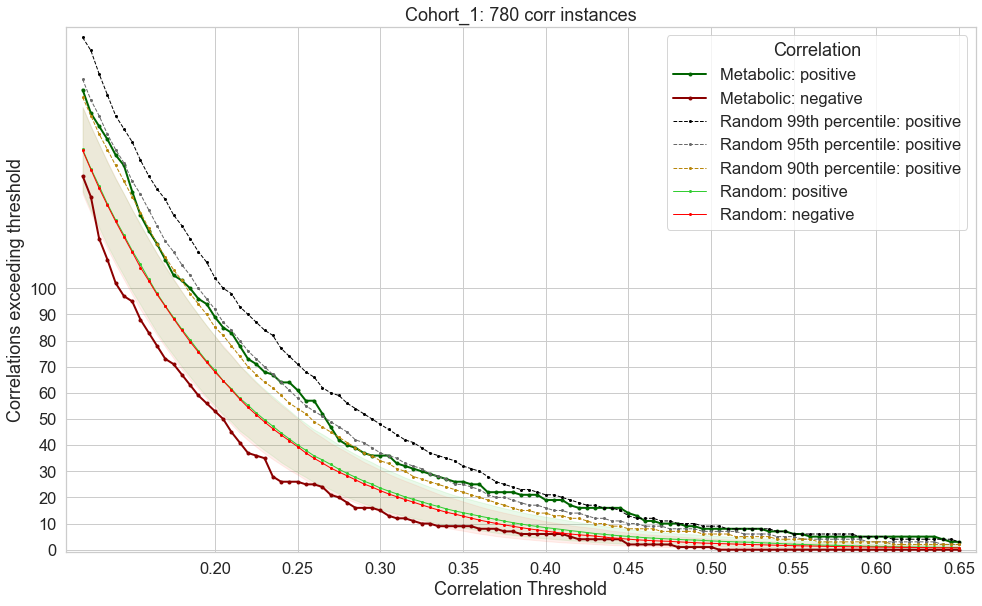

In [40]:

#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 1.5,style="whitegrid")

ax = plt.figure(figsize=(14.014, 8.76))
plt.ylim(-1, 200)
plt.yticks([0,10,20,30,40,50,
            60,70,80,90,100])
plt.xticks([0.2,0.25,0.3,0.35,
           0.40,0.45,0.5,0.55,
           0.60,0.65])
plt.xlim(0.11,0.66)

x = df_all_corr_averages.index.tolist()
met_pos = df_metabolic['pos cases'].tolist()
met_neg = df_metabolic['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile99 = quantile99['pos cases'].tolist()
percentile95 = quantile95['pos cases'].tolist()
percentile90 = quantile90['pos cases'].tolist()




plt.plot(x, met_pos, linewidth=2, markersize=3, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=2, markersize=3, marker = 'o',color='darkred')

plt.plot(x, percentile99, linewidth=1, markersize=2, linestyle='dashed',
         marker = 'o',color='black')

plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
         marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
         marker = 'o',color='darkgoldenrod')


plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=2, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=2, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            "Random 99th percentile: positive",
            "Random 95th percentile: positive",
            "Random 90th percentile: positive",
            
            "Random: positive",
            "Random: negative"], loc ="upper right",title="Correlation")

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Correlations exceeding threshold')
plt.title('Cohort_1: 780 corr instances')
plt.tight_layout()

plt.savefig('3APlus.pdf', format='pdf', dpi=175)
plt.show()




In [41]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")


ax = plt.figure(figsize=(16, 10))
plt.ylim(-1, 150)
plt.yticks([0,50,100])
plt.xticks([0.2,0.25,0.3,35,
           0.40,0.45,0.5,0.55,
           0.60,0.65])
plt.xlim(0.19,0.66)


x = df_all_corr_averages.index.tolist()
met_pos = df_metabolic['pos cases'].tolist()
met_neg = df_metabolic['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')
#plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='mediumturquoise')
#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=2, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=2, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            "Random 95th  percentile: positive",
            "Random 5th percentile: negative",
            
            "Random: positive",
            "Random: negative"], loc ="upper right",title="Correlation")

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Instances')
plt.title('Intertissue and within tissue')
plt.savefig('InterIntraCorrTo65',dpi=600)
'''

'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(-1, 150)\nplt.yticks([0,50,100])\nplt.xticks([0.2,0.25,0.3,35,\n           0.40,0.45,0.5,0.55,\n           0.60,0.65])\nplt.xlim(0.19,0.66)\n\n\nx = df_all_corr_averages.index.tolist()\nmet_pos = df_metabolic[\'pos cases\'].tolist()\nmet_neg = df_metabolic[\'neg cases\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_pos = df_all[\'pos lower\'].tolist()\nupper_bound_pos = df_all[\'pos higher\'].tolist()\n\nlower_bound_neg = df_all[\'neg lower\'].tolist()\nupper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = quantile95[\'pos cases\'].tolist()\npercentile05 = quantile05[\'neg cases\'].tolist()\n\n\n\n\n\nplt.plot(x, met_pos, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, met_neg, linewidth=3, markersize=

In [29]:
ratio_quantile95 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)
ratio_quantile90 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [30]:
display(ratio_quantile95 )

pos cases  neg cases    ratios
corr thresholds                                
0.120               180.00     180.05  1.231884
0.125               172.05     173.00  1.232028
0.130               166.00     167.00  1.238137
0.135               159.00     160.00  1.240434
0.140               153.00     154.00  1.247738
...                    ...        ...       ...
0.630                 3.00       2.00  3.000000
0.635                 3.00       2.00  3.000000
0.640                 2.00       2.00  2.000000
0.645                 2.00       2.00  2.000000
0.650                 2.00       2.00  2.000000

[107 rows x 3 columns]

In [31]:
display(ratio_quantile90)

pos cases  neg cases    ratios
corr thresholds                                
0.120                173.1      173.0  1.164085
0.125                166.1      166.1  1.158047
0.130                159.0      158.1  1.169227
0.135                153.1      152.0  1.171759
0.140                147.0      146.0  1.179634
...                    ...        ...       ...
0.630                  2.0        2.0  2.000000
0.635                  2.0        2.0  2.000000
0.640                  2.0        2.0  2.000000
0.645                  2.0        2.0  2.000000
0.650                  2.0        2.0  2.000000

[107 rows x 3 columns]

In [32]:
display(ratio_quantile90.sample(50))

pos cases  neg cases    ratios
corr thresholds                                
0.435                 10.0        9.0  3.500000
0.465                  8.0        7.0  4.000000
0.570                  3.0        3.0  3.000000
0.270                 45.0       45.0  1.476190
0.615                  2.0        2.0  2.000000
0.255                 52.0       51.0  1.369079
0.150                135.0      135.0  1.187639
0.645                  2.0        2.0  2.000000
0.410                 13.0       11.0  3.000000
0.490                  7.0        5.0  4.000000
0.625                  2.0        2.0  2.000000
0.540                  4.0        4.0  3.000000
0.525                  5.0        4.0  4.000000
0.330                 26.0       25.0  1.818182
0.370                 18.0       16.1  2.250000
0.545                  4.0        3.1  3.000000
0.280                 41.0       41.0  1.500000
0.355                 21.0       19.0  2.000000
0.195                 90.0       90.0  1.254169
0.240                 59.0       59.0  1.340669
0.530                  5.0        4.0  4.000000
0.230                 64.1       65.0  1.325000
0.220                 70.0       71.0  1.307692
0.235                 62.0       61.0  1.343187
0.335                 25.0       23.0  1.875000
0.520                  5.0        4.0  4.000000
0.510                  6.0        5.0  4.000000
0.245                 56.1       57.0  1.352941
0.460                  8.0        7.0  4.000000
0.165                117.0      118.0  1.204155
0.555                  4.0        3.0  3.000000
0.275                 43.0       43.0  1.500000
0.125                166.1      166.1  1.158047
0.265                 47.0       47.0  1.437500
0.350                 22.0       20.0  2.000000
0.315                 30.0       29.0  1.687500
0.650                  2.0        2.0  2.000000
0.205                 82.0       82.0  1.254545
0.610                  2.0        2.0  2.000000
0.560                  4.0        3.0  3.000000
0.550                  4.0        3.0  3.000000
0.155                129.0      128.0  1.207962
0.325                 27.0       26.0  1.750000
0.470                  7.0        6.0  4.000000
0.505                  6.0        5.0  4.000000
0.250                 54.0       54.0  1.342857
0.580                  3.0        3.0  3.000000
0.535                  5.0        4.0  3.050000
0.170                112.0      113.0  1.208430
0.640                  2.0        2.0  2.000000

In [33]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")


ax = plt.figure(figsize=(16, 10))
plt.ylim(0, 12)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])
plt.xlim(0.19,0.66)

x = df_all_corr_averages.index.tolist()
met_ratio = df_metabolic['ratio pos neg'].tolist()
avg_ratio = df_all['ratios'].tolist()

#mean_ran_pos = df_all['pos cases'].tolist()
#mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratios std minus'].tolist()
upper_bound_ratio = df_all['ratios std plus'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg ",
            "Random 95th  percentile ratio: pos /neg",
            "Random 99th  percentile ratio: pos /neg"
          
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper left",title="Ratios")
            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Ratio')
plt.title('Intertissue and within tissue')
plt.savefig('Inter plus corr Ratio legend', dpi=600)
#plt.savefig('CombinedCorrNoIntra.png')
'''


'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(0, 12)\nplt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])\nplt.xticks([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])\nplt.xlim(0.19,0.66)\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_metabolic[\'ratio pos neg\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\n#mean_ran_pos = df_all[\'pos cases\'].tolist()\n#mean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratios std minus\'].tolist()\nupper_bound_ratio = df_all[\'ratios std plus\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\npercentile90 = ratio_quantile90[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \n\n\n\n\nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = \'o

In [34]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")


ax = plt.figure(figsize=(16, 10))
plt.ylim(0, 4)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])
plt.xlim(0.19,0.66)


x = df_all_corr_averages.index.tolist()
met_ratio = df_metabolic['ratio pos neg'].tolist()
avg_ratio = df_all['ratios'].tolist()

#mean_ran_pos = df_all['pos cases'].tolist()
#mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratios std minus'].tolist()
upper_bound_ratio = df_all['ratios std plus'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg ",
            "Random 95th  percentile ratio: pos /neg",
            "Random 99th  percentile ratio: pos /neg"
          
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper right",title="Ratios")

            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Ratio')
plt.title('Intertissue and within tissue')
plt.savefig('Inter plus corr Ratio no legend', dpi=600)
#plt.savefig('CombinedCorrNoIntra.png')
'''


'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(0, 4)\nplt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])\nplt.xticks([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])\nplt.xlim(0.19,0.66)\n\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_metabolic[\'ratio pos neg\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\n#mean_ran_pos = df_all[\'pos cases\'].tolist()\n#mean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratios std minus\'].tolist()\nupper_bound_ratio = df_all[\'ratios std plus\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\npercentile90 = ratio_quantile90[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \n\n\n\n\nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = \'